####################################

# Part 1, Data processing

####################################

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from cleantext import clean
import re as regular_expression
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bruger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bruger/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#############################

# Task 1

#############################

Task 1, part 1: Her åbner vi datafilen, som vi skal strukturere, behandle og cleane. 

In [13]:
df = pd.read_csv('news_sample.csv')
df

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,39259,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2017/12/priso...,"Prison for Rahm, God’s Work And Many Others\n\...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Prison for Rahm, God’s Work And Many Others",NaN,NaN,[''],NaN,NaN,NaN
246,246,39468,beforeitsnews.com,fake,http://beforeitsnews.com/diy/2017/11/4-useful-...,4 Useful Items for Your Tiny Home\n\nHeadline:...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,4 Useful Items for Your Tiny Home,Dimitry K,NaN,[''],NaN,NaN,NaN
247,247,39477,www.newsmax.com,NaN,https://www.newsmax.com/politics/michael-hayde...,Former CIA Director Michael Hayden said Thursd...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Michael Hayden: We Should Be 'Frightened' by T...,Todd Beamon,NaN,"['michael hayden', 'sthole countries', 'daca',...",President Donald Trump's reported remarks abou...,"Homeland Security, Trump Administration, Immig...",NaN
248,248,39550,www.newsmax.com,NaN,https://www.newsmax.com/newsfront/antonio-saba...,Antonio Sabato Jr. says Hollywood's liberal el...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Antonio Sabato Jr.: It's Oprah or Bust for Hol...,Bill Hoffmann,NaN,"['antonio sabato jr', 'oprah winfrey', 'presid...",Antonio Sabato Jr. says Hollywood's liberal el...,"Trump Administration, ISIS/Islamic State, News...",NaN


In [15]:
def clean_text(text):
    if pd.isna(text): 
        return ''
    text = str(text).lower()  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '<DATE>', text)  
    text = re.sub(r'\d+', '<NUM>', text)  
    text = re.sub(r'\S+@\S+', '<EMAIL>', text)  
    text = re.sub(r'https?://\S+', '<URL>', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    return text



df_cleaned = df.applymap(clean_text)

print(df_cleaned)

    Unnamed: 0   id               domain        type  url  \
0          NUM  NUM               awmcom  unreliable  URL   
1          NUM  NUM     beforeitsnewscom        fake  URL   
2          NUM  NUM           cnnnextcom  unreliable  URL   
3          NUM  NUM               awmcom  unreliable  URL   
4          NUM  NUM  bipartisanreportcom   clickbait  URL   
..         ...  ...                  ...         ...  ...   
245        NUM  NUM     beforeitsnewscom        fake  URL   
246        NUM  NUM     beforeitsnewscom        fake  URL   
247        NUM  NUM        wwwnewsmaxcom              URL   
248        NUM  NUM        wwwnewsmaxcom              URL   
249        NUM  NUM        wwwnewsmaxcom              URL   

                                               content         scraped_at  \
0    sometimes the power of christmas will make you...  DATE NUMNUMNUMNUM   
1    awakening of NUM strands of dna  reconnecting ...  DATE NUMNUMNUMNUM   
2    never hike alone a friday the N

Processing:

In [4]:
df['cleaned_content'] = df['content'].apply(clean_text)

df['content_tokens'] = df['cleaned_content'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
df['content_tokens_no_stop'] = df['content_tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

stemmer = PorterStemmer()
df['content_tokens_stemmed'] = df['content_tokens_no_stop'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

original_vocab_size = df['content_tokens'].explode().nunique()
vocab_size_no_stop = df['content_tokens_no_stop'].explode().nunique()
vocab_size_stemmed = df['content_tokens_stemmed'].explode().nunique()

def calculate_reduction_rate(original_size, reduced_size):
    return (original_size - reduced_size) / original_size

stopwords_reduction_rate = calculate_reduction_rate(original_vocab_size, vocab_size_no_stop)
stemming_reduction_rate = calculate_reduction_rate(vocab_size_no_stop, vocab_size_stemmed)

print(f'Original Vocabulary Size: {original_vocab_size}')
print(f'Vocabulary Size after removing stopwords: {vocab_size_no_stop}')
print(f'Reduction rate after removing stopwords: {stopwords_reduction_rate:.2f}')
print(f'Vocabulary Size after stemming: {vocab_size_stemmed}')
print(f'Reduction rate after stemming: {stemming_reduction_rate:.2f}')

df[['content_tokens', 'content_tokens_no_stop', 'content_tokens_stemmed']].head()


Original Vocabulary Size: 16827
Vocabulary Size after removing stopwords: 16681
Reduction rate after removing stopwords: 0.01
Vocabulary Size after stemming: 11519
Reduction rate after stemming: 0.31


,content_tokens,content_tokens_no_stop,content_tokens_stemmed
0,"[sometimes, the, power, of, christmas, will, m...","[sometimes, power, christmas, make, wild, wond...","[sometim, power, christma, make, wild, wonder,..."
1,"[awakening, of, <, NUM, >, strands, of, dna, –...","[awakening, <, NUM, >, strands, dna, –, “, rec...","[awaken, <, num, >, strand, dna, –, “, reconne..."
2,"[never, hike, alone, :, a, friday, the, <, NUM...","[never, hike, alone, :, friday, <, NUM, >, th,...","[never, hike, alon, :, friday, <, num, >, th, ..."
3,"[when, a, rare, shark, was, caught, ,, scienti...","[rare, shark, caught, ,, scientists, left, blu...","[rare, shark, caught, ,, scientist, left, blun..."
4,"[donald, trump, has, the, unnerving, ability, ...","[donald, trump, unnerving, ability, ability, c...","[donald, trump, unnerv, abil, abil, creat, rea..."


###################
# Task 2
###################

Starter med at indlæse datafilen "995,000_rows.csv".

In [5]:
df_BigBoy = pd.read_csv('995,000_rows.csv', dtype=str)
df_BigBoy

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,732,7444726.0,nationalreview.com,political,http://www.nationalreview.com/node/152734/%E2%...,Plus one article on Google Plus\n\n(Thanks to ...,2017-11-27T01:14:42.983556,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Iran News Round Up,NaN,NaN,"['National Review', 'National Review Online', ...",NaN,NaN,NaN,NaN
1,1348,6213642.0,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2012/06/the-c...,The Cost Of The Best Senate Banking Committee ...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,The Cost Of The Best Senate Banking Committee ...,NaN,NaN,[''],NaN,NaN,NaN,NaN
2,7119,3867639.0,dailycurrant.com,satire,http://dailycurrant.com/2016/01/18/man-awoken-...,Man Awoken From 27-Year Coma Commits Suicide A...,2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Man Awoken From 27-Year Coma Commits Suicide A...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,1518,9560791.0,nytimes.com,reliable,https://query.nytimes.com/gst/fullpage.html?re...,WHEN Julia Geist was asked to draw a picture o...,2018-02-11 00:46:42.632962,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Opening a Gateway for Girls to Enter the Compu...,NaN,NaN,"['Computers and the Internet', 'Women and Girl...",WHEN Julia Geist was asked to draw a picture o...,NaN,NaN,nytimes
4,9345,2059625.0,infiniteunknown.net,conspiracy,http://www.infiniteunknown.net/2011/09/14/100-...,– 100 Compiled Studies on Vaccine Dangers (Act...,2017-11-10T11:18:44.524042,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,100 Compiled Studies on Vaccine Dangers – Infi...,NaN,NaN,[''],NaN,"Lymphoma, Hepatitis B, Immune System, Health, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994995,9376,1304673,21stcenturywire.com,conspiracy,http://21stcenturywire.com/tag/kony-2012/,By\n\n21WIRE + Intervention Watch | All we can...,2017-11-09T12:48:34.461199,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,KONY 2012 Archives,NaN,NaN,[''],NaN,"Michelle Obama, Drones, Selfie, Uganda, smart ...",NaN,NaN
994996,9625,7273484,nationalreview.com,political,http://www.nationalreview.com/node/152734/%E2%...,Plus one article on Google Plus\n\n(Thanks to ...,2017-11-27T01:14:42.983556,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Iran News Round Up,NaN,NaN,"['National Review', 'National Review Online', ...",NaN,NaN,NaN,NaN
994997,9561,3489380,thesaker.is,unknown,http://thesaker.is/china-and-russia-are-acquir...,"China and Russia are Acquiring Gold, Dumping U...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"China and Russia are Acquiring Gold, Dumping U...",The Saker,NaN,[''],A bird's eye view of the vineyard,"Gold, Dollar, Russia, China",NaN,NaN
994998,4293,6315455,express.co.uk,rumor,https://www.express.co.uk/pictures/sport/6708/...,Liverpool have signed Sadio Mane from Southamp...,2017-11-27T01:14:33.570665,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Twitter reacts as Liverpool sign Sadio Mane,NaN,NaN,[''],Express Sport brings you all the best tweets a...,NaN,NaN,NaN


# Non-trivial observations/discovories

Vi vil nu prøve at danne os et overblik og finde mønstre ved at undersøge dataen, det første vi gør her er at finde ud af hvor mange af hver type der eksisterer i datasættet.

In [6]:
type_counts = df_BigBoy['type'].value_counts()

print(type_counts)



type
reliable                      218564
political                     194518
bias                          133232
fake                          104883
conspiracy                     97314
rumor                          56445
unknown                        43534
unreliable                     35332
clickbait                      27412
junksci                        14040
satire                         13160
hate                            8779
2018-02-10 13:43:39.521661         1
Name: count, dtype: int64


Der observeres at der ved en fejl er lagt en enkelt dato under type, den fjerner vi blot. En anden ting at ligge mærke til er, at der er 43534 artikler der har en unknown type, hvilket er en delmængde vi derfor ikke kan tage stilling til og derfor også vil fjerne. Derudover laver vi et histogram for at visualiere forekomsten af hver type.

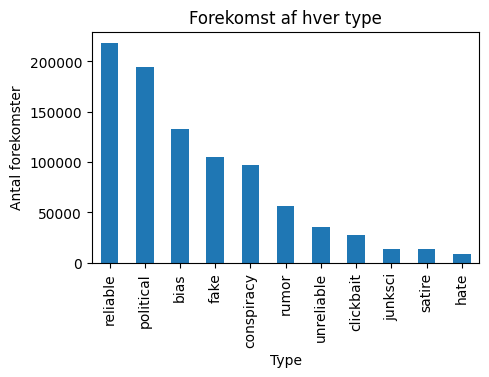

In [7]:
df_filtered = df_BigBoy[(df_BigBoy['type'] != '2018-02-10 13:43:39.521661') & (df_BigBoy['type'] != 'unknown')]

type_counts = df_filtered['type'].value_counts()

plt.figure(figsize=(5,3))
type_counts.plot(kind='bar')
plt.title('Forekomst af hver type')
plt.xlabel('Type')
plt.ylabel('Antal forekomster')
plt.xticks(rotation=90) 
plt.show()


Ud fra histrogrammet observerer vi at det er typerne "reliable" og "political", der klart dominerer. Der ligges også mærke til der er en del typer, som både kan opfattes som værende fake eller reliable, altså hvor det ikke er 100% klart.

Til at starte med, vil vi gerne lave en observation der tjekker antallet af forskellige nyhedstyper, for de 10 største domæner i datasættet.

In [8]:
top_domains = df_BigBoy['domain'].value_counts().head(10).index.tolist()

top_domains_df = df_BigBoy[df_BigBoy['domain'].isin(top_domains)]

domain_type_counts = top_domains_df.groupby(['domain', 'type']).size().unstack(fill_value=0)

print(domain_type_counts)


type                 bias  conspiracy   fake  political  reliable  rumor  \
domain                                                                     
abovetopsecret.com      0       27947      0          0         0      0   
beforeitsnews.com       0           0  91468          0         0      0   
dailykos.com            0           0      0      77640         0      0   
express.co.uk           0           0      0          0         0  55983   
nationalreview.com      0           0      0      37377         0      0   
nytimes.com             0           0      0          0    176144      0   
sputniknews.com     37229           0      0          0         0      0   
wikileaks.org           0           0      0          0         0      0   

type                unreliable  
domain                          
abovetopsecret.com           0  
beforeitsnews.com            0  
dailykos.com                 0  
express.co.uk                0  
nationalreview.com           0  
nytimes.

Dette resultat er tildeles anderledes end forventet, det viser sig altså at hvert domæne kun indeholder en slags type. Det vil sige at alle news fra nytimes.com siges at være reliable og alle news fra beforeitsnews.com siges at være fake osv.. Vi har dermed fundet ud af at det gælder for dette datasæt, at en artikels troværdighed kun kommer an på hvilket domæne det kommer fra. Dette skaber en del eftertanke, kan det virkelig passe at nytimes.com kun har reliable news? Det virker en del problematisk den måde at datasættet er bygget på. Som vi også kan observere på vores resultater har nytimes.com 176144 reliable news ud af i alt 218564, hvilket vil sige at nytimes.com står for 80,6% af alle reliable news i hele datasættet. Det næste vi gerne vil kigge på er hvor mange forskellige domæner at datasættet indeholder, samt hvor mange af dem der faktisk indeholder reliable news.

In [18]:
unique_domains_count = df_BigBoy['domain'].nunique()

print(f"Antallet af domæner i alt: {unique_domains_count}")

reliable_news_df = df_BigBoy[df_BigBoy['type'] == 'reliable']

reliable_domains_count = reliable_news_df['domain'].nunique()

print(f"Antallet af domæner der faktisk indeholder reliable news: {reliable_domains_count}")


Antallet af domæner i alt: 683
Antallet af domæner der faktisk indeholder reliable news: 80


Dette leder os frem til en observation, som siger at kun 80/683*100=11,71% af domænerne i datasættet indeholder reliable news. Det betyder altså også at 88,29% af hele datasættets domæner ikke indeholder typen "reliable" news.

##########################

# Task 3

##########################

Her starter vi med at bruge vores rensningsfunktion til at rense dataen fra datasættet "995,000_rows.csv".

In [16]:
def clean_text(text):
    if pd.isna(text): 
        return ''
    text = str(text).lower() 
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '<DATE>', text)  
    text = re.sub(r'\d+', '<NUM>', text)  
    text = re.sub(r'\S+@\S+', '<EMAIL>', text)  
    text = re.sub(r'https?://\S+', '<URL>', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    return text

input_file_path = 'FakeNewsProject/995,000_rows.csv'

chunk_size = 120000

cleaned_df = pd.DataFrame()

for chunk in pd.read_csv(input_file_path, chunksize=chunk_size, dtype=str):
    cleaned_chunk = chunk.applymap(clean_text)
    cleaned_df = pd.concat([cleaned_df, cleaned_chunk], ignore_index=True)

Vi gemmer nu den rensede data til en fil 'cleaned_df.csv' for at gøre den nemmere at arbejde med fremover.

In [21]:
cleaned_df.to_csv('cleaned_df.csv', index=False)

Nu hvor vi har vores rensede datasæt, vil vi starte med at fjerne stopwords og kigge på ordforrådets størrelse efter fjernelsen af stopwords. Vi gemmer også dette til en csv fil, altså et rensede sæt hvor stopwords også er fjernet. Gemt som 'cleaned_df_with_tokens.csv', dette gøres for at bruge samme datasæt i næste step hvor vi vil lave stemming og fjerne word variations. 

In [19]:
cleaned_file_path = 'cleaned_df.csv'
stop_words = set(stopwords.words('english'))
chunk_size = 50000  

def remove_stopwords(text):
    if pd.isna(text):
        return ''
    words = word_tokenize(text)
    return ' '.join(word for word in words if word.lower() not in stop_words)

vocabulary = Counter()

tokenized_file_path = 'cleaned_df_with_tokens.csv'

first_chunk = True

for chunk in pd.read_csv(cleaned_file_path, chunksize=chunk_size, dtype=str):
    chunk['tokens'] = chunk['content'].apply(remove_stopwords)
    
    for tokens in chunk['tokens']:
        vocabulary.update(tokens.lower().split())  

    if first_chunk:
        chunk.to_csv(tokenized_file_path, index=False, mode='w')
        first_chunk = False
    else:
        chunk.to_csv(tokenized_file_path, index=False, mode='a', header=False)

vocabulary_size = len(vocabulary)
print(f"Vocabulary size after removing stopwords: {vocabulary_size}")



Vocabulary size after removing stopwords: 2215479


In [20]:
df_final1 = pd.read_csv('cleaned_df_with_tokens.csv')
df_final1


,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokens
0,NUM,NUMNUM,nationalreviewcom,political,URL,plus one article on google plus thanks to ali ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,iran news round up,NaN,NaN,national review national review online article,NaN,NaN,NaN,NaN,plus one article google plus thanks ali alfone...
1,NUM,NUMNUM,beforeitsnewscom,fake,URL,the cost of the best senate banking committee ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,the cost of the best senate banking committee ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cost best senate banking committee jp morgan b...
2,NUM,NUMNUM,dailycurrantcom,satire,URL,man awoken from NUMyear coma commits suicide a...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,man awoken from NUMyear coma commits suicide a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,man awoken NUMyear coma commits suicide learni...
3,NUM,NUMNUM,nytimescom,reliable,URL,when julia geist was asked to draw a picture o...,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,opening a gateway for girls to enter the compu...,NaN,NaN,computers and the internet women and girls car...,when julia geist was asked to draw a picture o...,NaN,NaN,nytimes,julia geist asked draw picture computer scient...
4,NUM,NUMNUM,infiniteunknownnet,conspiracy,URL,NUM compiled studies on vaccine dangers activ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,NUM compiled studies on vaccine dangers infin...,NaN,NaN,NaN,NaN,lymphoma hepatitis b immune system health diab...,NaN,NaN,NUM compiled studies vaccine dangers activist ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994995,NUM,NUM,NUMstcenturywirecom,conspiracy,URL,by NUMwire intervention watch all we can say...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,kony NUM archives,NaN,NaN,NaN,NaN,michelle obama drones selfie uganda smart powe...,NaN,NaN,NUMwire intervention watch say anyone signed a...
994996,NUM,NUM,nationalreviewcom,political,URL,plus one article on google plus thanks to ali ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,iran news round up,NaN,NaN,national review national review online article,NaN,NaN,NaN,NaN,plus one article google plus thanks ali alfone...
994997,NUM,NUM,thesakeris,unknown,URL,china and russia are acquiring gold dumping us...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,china and russia are acquiring gold dumping us...,the saker,NaN,NaN,a birds eye view of the vineyard,gold dollar russia china,NaN,NaN,china russia acquiring gold dumping us dollars...
994998,NUM,NUM,expresscouk,rumor,URL,liverpool have signed sadio mane from southamp...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,twitter reacts as liverpool sign sadio mane,NaN,NaN,NaN,express sport brings you all the best tweets a...,NaN,NaN,NaN,liverpool signed sadio mane southampton fans r...


Her laver vi stemming og fjerner ord variationer og kigger igen på det nye vocabulary size. Dette er vores endelige datasæt i og med det er renset, stemmede, tokenized og stopord er fjernet. Da det er vores endeligt datasæt gemmer vi også dette til en csv fil, da det er denne data vi skal bruge til at lave en fakenews detecter. Den endelige data er gemt som: 'final_cleaned_stemmed_df.csv'

In [23]:
stemmer = PorterStemmer()

def stem_words(token_string):
    if isinstance(token_string, str):
        words = token_string.split()
        return ' '.join(stemmer.stem(word) for word in words)
    else:
        return '' 

tokenized_file_path = 'cleaned_df_with_tokens.csv'  

final_stemmed_file_path = 'final_cleaned_stemmed_df.csv'

chunk_size = 50000  

stemmed_vocabulary = Counter()

first_chunk = True
for chunk in pd.read_csv(tokenized_file_path, chunksize=chunk_size):
    chunk['stemmed_content'] = chunk['tokens'].apply(stem_words)
    
    for stemmed_content in chunk['stemmed_content']:
        stemmed_vocabulary.update(stemmed_content.lower().split())
    
    columns_to_include = chunk.columns.tolist() + ['stemmed_content']
    
    if first_chunk:
        chunk.to_csv(final_stemmed_file_path, columns=columns_to_include, index=False, mode='w')
        first_chunk = False
    else:
        chunk.to_csv(final_stemmed_file_path, columns=columns_to_include, index=False, mode='a', header=False)

stemmed_vocabulary_size = len(stemmed_vocabulary)
print(f"Vocabulary size after stemming: {stemmed_vocabulary_size}")


Vocabulary size after stemming: 1946274


In [5]:
df_final = pd.read_csv('final_cleaned_stemmed_df.csv')
df_final

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokens,stemmed_content,stemmed_content.1
0,NUM,NUMNUM,nationalreviewcom,political,URL,plus one article on google plus thanks to ali ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,iran news round up,NaN,NaN,national review national review online article,NaN,NaN,NaN,NaN,plus one article google plus thanks ali alfone...,plu one articl googl plu thank ali alfoneh ass...,plu one articl googl plu thank ali alfoneh ass...
1,NUM,NUMNUM,beforeitsnewscom,fake,URL,the cost of the best senate banking committee ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,the cost of the best senate banking committee ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cost best senate banking committee jp morgan b...,cost best senat bank committe jp morgan buy nu...,cost best senat bank committe jp morgan buy nu...
2,NUM,NUMNUM,dailycurrantcom,satire,URL,man awoken from NUMyear coma commits suicide a...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,man awoken from NUMyear coma commits suicide a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,man awoken NUMyear coma commits suicide learni...,man awoken numyear coma commit suicid learn do...,man awoken numyear coma commit suicid learn do...
3,NUM,NUMNUM,nytimescom,reliable,URL,when julia geist was asked to draw a picture o...,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,opening a gateway for girls to enter the compu...,NaN,NaN,computers and the internet women and girls car...,when julia geist was asked to draw a picture o...,NaN,NaN,nytimes,julia geist asked draw picture computer scient...,julia geist ask draw pictur comput scientist l...,julia geist ask draw pictur comput scientist l...
4,NUM,NUMNUM,infiniteunknownnet,conspiracy,URL,NUM compiled studies on vaccine dangers activ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,NUM compiled studies on vaccine dangers infin...,NaN,NaN,NaN,NaN,lymphoma hepatitis b immune system health diab...,NaN,NaN,NUM compiled studies vaccine dangers activist ...,num compil studi vaccin danger activist post s...,num compil studi vaccin danger activist post s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994995,NUM,NUM,NUMstcenturywirecom,conspiracy,URL,by NUMwire intervention watch all we can say...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,kony NUM archives,NaN,NaN,NaN,NaN,michelle obama drones selfie uganda smart powe...,NaN,NaN,NUMwire intervention watch say anyone signed a...,numwir intervent watch say anyon sign avaaz pe...,numwir intervent watch say anyon sign avaaz pe...
994996,NUM,NUM,nationalreviewcom,political,URL,plus one article on google plus thanks to ali ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,iran news round up,NaN,NaN,national review national review online article,NaN,NaN,NaN,NaN,plus one article google plus thanks ali alfone...,plu one articl googl plu thank ali alfoneh ass...,plu one articl googl plu thank ali alfoneh ass...
994997,NUM,NUM,thesakeris,unknown,URL,china and russia are acquiring gold dumping us...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,china and russia are acquiring gold dumping us...,the saker,NaN,NaN,a birds eye view of the vineyard,gold dollar russia china,NaN,NaN,china russia acquiring gold dumping us dollars...,china russia acquir gold dump us dollar evid c...,china russia acquir gold dump us dollar evid c...
994998,NUM,NUM,expresscouk,rumor,URL,liverpool have signed sadio mane from southamp...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,twitter reacts as liverpool sign sadio mane,NaN,NaN,NaN,express sport brings you all the best tweets a...,NaN,NaN,NaN,liverpool signed sadio mane southampton fans r...,liverpool sign sadio mane southampton fan reac...,liverpool sign sadio mane southampton fan reac...


Som vi kan se på outputtet er der kommet to nye kolonner altså 'stemmed_content' og 'stemmed_content.1', det er kun meningen vi skal bruge den ene, så derfor fjerner vi 'stemmed_content.1' og gemmer den igen.

In [11]:
df_final.drop(columns=[col for col in df_final.columns if '.1' in col], inplace=True)

df_final.to_csv('final_cleaned_stemmed_df.csv', index=False)



In [12]:
df_final

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokens,stemmed_content
0,NUM,NUMNUM,nationalreviewcom,political,URL,plus one article on google plus thanks to ali ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,iran news round up,NaN,NaN,national review national review online article,NaN,NaN,NaN,NaN,plus one article google plus thanks ali alfone...,plu one articl googl plu thank ali alfoneh ass...
1,NUM,NUMNUM,beforeitsnewscom,fake,URL,the cost of the best senate banking committee ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,the cost of the best senate banking committee ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cost best senate banking committee jp morgan b...,cost best senat bank committe jp morgan buy nu...
2,NUM,NUMNUM,dailycurrantcom,satire,URL,man awoken from NUMyear coma commits suicide a...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,man awoken from NUMyear coma commits suicide a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,man awoken NUMyear coma commits suicide learni...,man awoken numyear coma commit suicid learn do...
3,NUM,NUMNUM,nytimescom,reliable,URL,when julia geist was asked to draw a picture o...,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,opening a gateway for girls to enter the compu...,NaN,NaN,computers and the internet women and girls car...,when julia geist was asked to draw a picture o...,NaN,NaN,nytimes,julia geist asked draw picture computer scient...,julia geist ask draw pictur comput scientist l...
4,NUM,NUMNUM,infiniteunknownnet,conspiracy,URL,NUM compiled studies on vaccine dangers activ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,NUM compiled studies on vaccine dangers infin...,NaN,NaN,NaN,NaN,lymphoma hepatitis b immune system health diab...,NaN,NaN,NUM compiled studies vaccine dangers activist ...,num compil studi vaccin danger activist post s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994995,NUM,NUM,NUMstcenturywirecom,conspiracy,URL,by NUMwire intervention watch all we can say...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,kony NUM archives,NaN,NaN,NaN,NaN,michelle obama drones selfie uganda smart powe...,NaN,NaN,NUMwire intervention watch say anyone signed a...,numwir intervent watch say anyon sign avaaz pe...
994996,NUM,NUM,nationalreviewcom,political,URL,plus one article on google plus thanks to ali ...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,iran news round up,NaN,NaN,national review national review online article,NaN,NaN,NaN,NaN,plus one article google plus thanks ali alfone...,plu one articl googl plu thank ali alfoneh ass...
994997,NUM,NUM,thesakeris,unknown,URL,china and russia are acquiring gold dumping us...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,china and russia are acquiring gold dumping us...,the saker,NaN,NaN,a birds eye view of the vineyard,gold dollar russia china,NaN,NaN,china russia acquiring gold dumping us dollars...,china russia acquir gold dump us dollar evid c...
994998,NUM,NUM,expresscouk,rumor,URL,liverpool have signed sadio mane from southamp...,NUMNUMNUMtNUMNUMNUMNUM,DATE NUMNUMNUMNUM,DATE NUMNUMNUMNUM,twitter reacts as liverpool sign sadio mane,NaN,NaN,NaN,express sport brings you all the best tweets a...,NaN,NaN,NaN,liverpool signed sadio mane southampton fans r...,liverpool sign sadio mane southampton fan reac...


For lige at give os selv et overblik, samt at kunne regne på reduktions raten finder vi altså ordforrådets størrelse på den raw data: '995,000_rows.csv'.

In [12]:
raw_data_path = '995,000_rows.csv'
chunk_size = 50000 

original_vocabulary = Counter()

def tokenize_text(text):
    if pd.isna(text):
        return []
    return word_tokenize(text)

for chunk in pd.read_csv(raw_data_path, chunksize=chunk_size, dtype=str):
    chunk['tokens'] = chunk['content'].apply(tokenize_text)
    for tokens in chunk['tokens']:
        original_vocabulary.update([word.lower() for word in tokens])

original_vocabulary_size = len(original_vocabulary)
print(f"Original Vocabulary Size: {original_vocabulary_size}")

Original Vocabulary Size: 2812209


Beregner reduktionsraterne:

In [15]:
original_vocabulary_size = 2812209  
vocabulary_size_after_stopwords = 2215479  
vocabulary_size_after_stemming = 1946274  

reduction_rate_stopwords = (original_vocabulary_size - vocabulary_size_after_stopwords) / original_vocabulary_size

reduction_rate_stemming = (original_vocabulary_size - vocabulary_size_after_stemming) / original_vocabulary_size

print(f"reduction rate after cleaning and removing stopwords: {reduction_rate_stopwords}")
print(f"reduction rate after stemming, cleaning and removing stopwords: {reduction_rate_stemming}")


reduction rate after cleaning and removing stopwords: 0.21219262152990762
reduction rate after stemming, cleaning and removing stopwords: 0.3079198594414569


Overblik:
Original Vocabulary Size: 2812209
Vocabulary size after removing stopwords: 2215479
reduction rate after cleaning and removing stopwords: 0.212
Vocabulary size after stemming: 1946274
reduction rate after stemming, cleaning and removing stopwords: 0.308

#####################
# Task 4
#####################

In [13]:
from sklearn.model_selection import train_test_split

df_final = df_final.sample(frac=1).reset_index(drop=True)

train_size = 0.8
test_and_val_size = (1 - train_size) / 2  

train_data, remaining_data = train_test_split(df_final, train_size=train_size, random_state=42)

val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

print(f"Total number of rows: {len(df_final)}")
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

assert len(train_data) + len(val_data) + len(test_data) == len(df_final)

Total number of rows: 995000
Training set size: 796000
Validation set size: 99500
Test set size: 99500


Vores datasæt df_final eller 'final_cleaned_stemmed_df.csv' er nu blevet opdelt i 3 på formen 80/10/10. Vi har altså train_data, som består af 80% af datasættet, samt test_data og val_data, som hver består af 10% af datasættet. Til sidst husker vi også lige at gemme disse 3 til csv filer, så vi er forberedt på at arbejde videre med dem:

In [14]:
train_data.to_csv('train_set.csv', index=False)
val_data.to_csv('validation_set.csv', index=False)
test_data.to_csv('test_set.csv', index=False)
